In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid_data_path = '../data.csv'
news_data_path = './noticias_en_classification.csv'
tweets_data_path = './tweets_en_classification.csv'
medidas_data_path = '../extra/medidas_governamentais/medidas_governamentais.csv'

In [3]:
df_covid = pd.read_csv(covid_data_path)
df_news = pd.read_csv(news_data_path, index_col='Unnamed: 0')
df_tweets = pd.read_csv(tweets_data_path, index_col='Unnamed: 0').drop(columns='Unnamed: 0.1')
df_medidas = pd.read_csv(medidas_data_path)

In [4]:
df_medidas

,data,local,tipo,desc
0,08-03-2020,Portugal,Medidas,Suspensão de Visitas a estabelecimentos prisio...
1,08-03-2020,Norte,Medidas,"ICBAS, FFUP E escola em Felgueiras Encerradas"
2,12-03-2020,Portugal,Medidas,Restrição de funcionamento de discotecas e est...
3,12-03-2020,Portugal,Medidas,Suspensão de visitas a lares
4,12-03-2020,Portugal,Medidas,Limite de pessoas em centros comerciais e serv...
...,...,...,...,...
115,01-07-2020,AML,Medidas,Limite de ajuntamentos até 10 pessoas
116,01-07-2020,AML,Medidas,Limite de ajuntamentos até 5 pessoas
117,01-07-2020,AML,Medidas,"Estabelecimentos fecham às 20h, excepto superm..."
118,02-07-2020,Portugal,Medidas,Nacionalização da EFACEC


In [5]:
df_covid.head(3)

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,obitos_50_59_f,obitos_50_59_m,obitos_60_69_f,obitos_60_69_m,obitos_70_79_f,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m
0,26-02-2020,26-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,27-02-2020,27-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28-02-2020,28-02-2020 00:00,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_covid.columns

Index(['data', 'data_dados', 'confirmados', 'confirmados_arsnorte',
       'confirmados_arscentro', 'confirmados_arslvt',
       'confirmados_arsalentejo', 'confirmados_arsalgarve',
       'confirmados_acores', 'confirmados_madeira', 'confirmados_estrangeiro',
       'confirmados_novos', 'recuperados', 'obitos', 'internados',
       'internados_uci', 'lab', 'suspeitos', 'vigilancia', 'n_confirmados',
       'cadeias_transmissao', 'transmissao_importada', 'confirmados_0_9_f',
       'confirmados_0_9_m', 'confirmados_10_19_f', 'confirmados_10_19_m',
       'confirmados_20_29_f', 'confirmados_20_29_m', 'confirmados_30_39_f',
       'confirmados_30_39_m', 'confirmados_40_49_f', 'confirmados_40_49_m',
       'confirmados_50_59_f', 'confirmados_50_59_m', 'confirmados_60_69_f',
       'confirmados_60_69_m', 'confirmados_70_79_f', 'confirmados_70_79_m',
       'confirmados_80_plus_f', 'confirmados_80_plus_m', 'sintomas_tosse',
       'sintomas_febre', 'sintomas_dificuldade_respiratoria',
     

In [7]:
df_covid['data'] = pd.to_datetime(df_covid['data'], errors= "coerce", dayfirst=True).dt.tz_localize(None)
df_news['data'] = pd.to_datetime(df_news['data'], errors= "coerce").dt.tz_localize(None)
df_tweets['date'] = pd.to_datetime(df_tweets['date'], errors= "coerce", format="%Y-%m-%d").dt.tz_localize(None)
df_medidas['data'] = pd.to_datetime(df_medidas['data'], errors= "coerce", dayfirst=True).dt.tz_localize(None)

<AxesSubplot:>

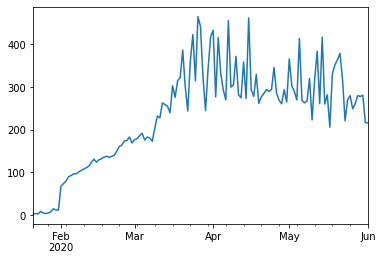

In [32]:
df_news[df_news.data <= '2020/06/01'].data.value_counts().sort_index().plot()

<AxesSubplot:>

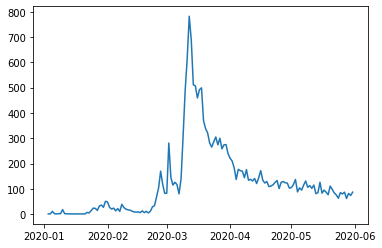

In [35]:
df_tweets[df_tweets.date <= '2020/06/01'].date.dt.date.value_counts().sort_index().plot()

In [30]:
df_covid.tail(1)

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,obitos_50_59_f,obitos_50_59_m,obitos_60_69_f,obitos_60_69_m,obitos_70_79_f,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m
96,2020-06-01,01-06-2020 00:00,32700,16760,3747,11335,259,372,137,90,...,14.0,31.0,43.0,83.0,111.0,165.0,548.0,410.0,724.0,700.0


<AxesSubplot:xlabel='data'>

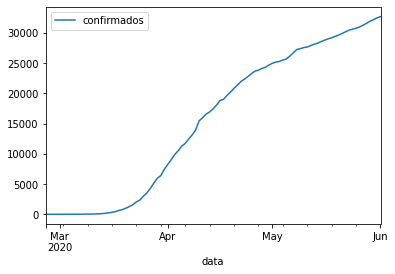

In [18]:
df_covid.plot(x='data', y='confirmados')

<AxesSubplot:xlabel='data'>

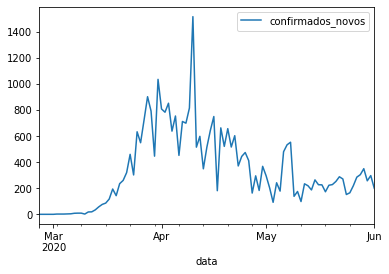

In [19]:
df_covid.plot(x='data', y='confirmados_novos')

<AxesSubplot:xlabel='data'>

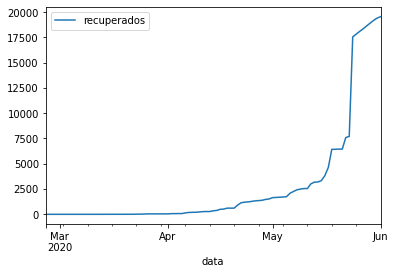

In [20]:
df_covid.plot(x='data', y='recuperados')

<AxesSubplot:xlabel='data'>

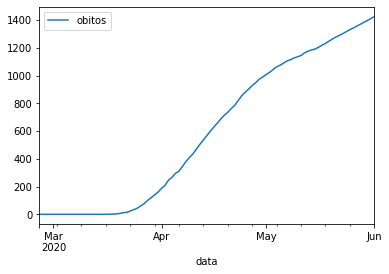

In [21]:
df_covid.plot(x='data', y='obitos')

<AxesSubplot:xlabel='data'>

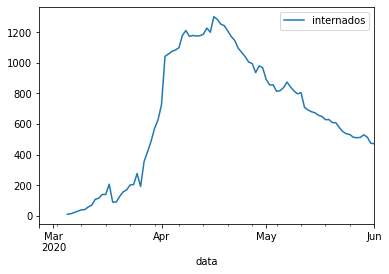

In [22]:
df_covid.plot(x='data', y='internados')

<AxesSubplot:xlabel='data'>

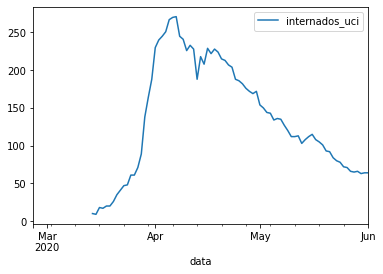

In [23]:
df_covid.plot(x='data', y='internados_uci')

In [70]:
[1, 3, 5][:-1]

[1, 3]

In [73]:
obitos_novos = [0]
obitos_novos.extend([obitoshoje - obitosontem for obitoshoje, obitosontem in zip(df_covid['obitos'].iloc[1:].values, df_covid['obitos'].iloc[:-1].values)])
df_covid['obitos_novos'] = obitos_novos

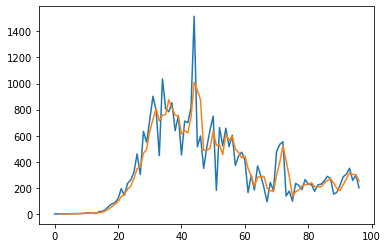

In [83]:
plt.plot(df_covid['confirmados_novos'])
plt.plot(df_covid['confirmados_novos'].rolling(3).mean())

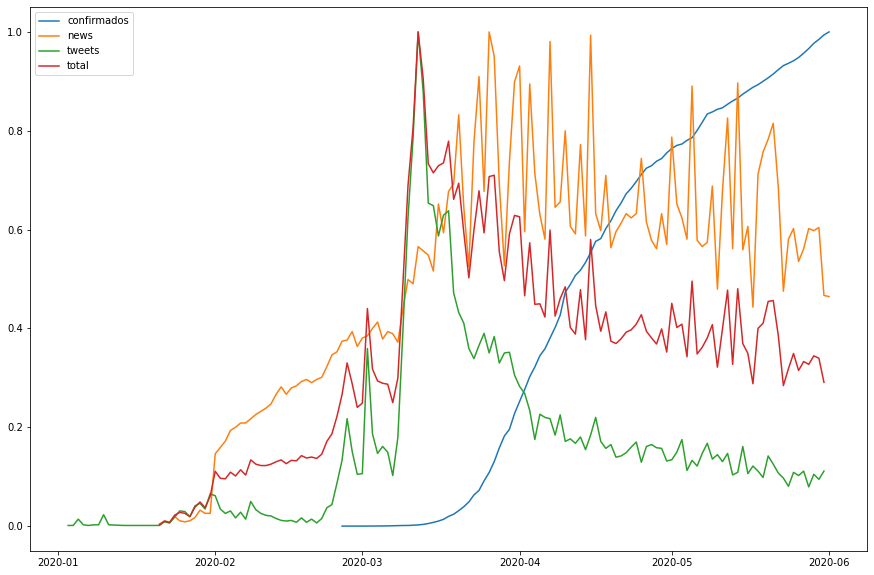

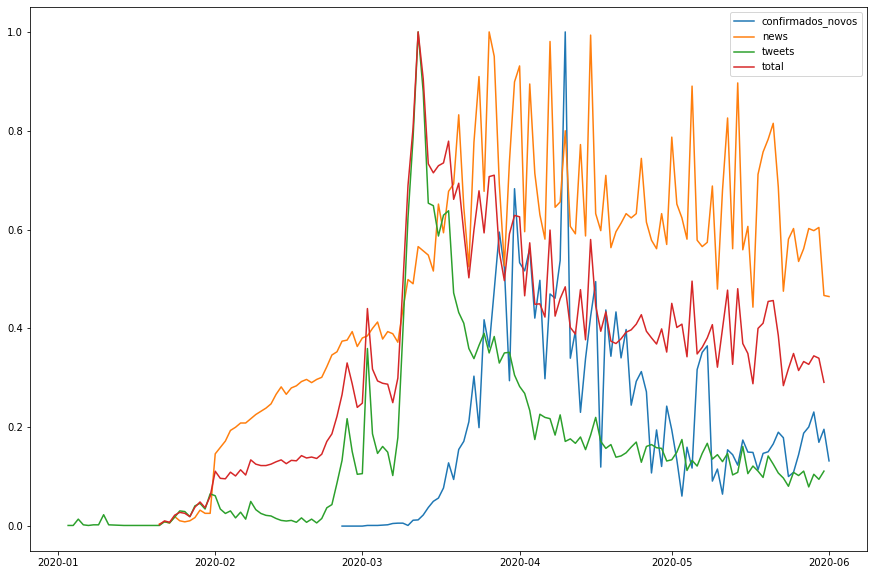

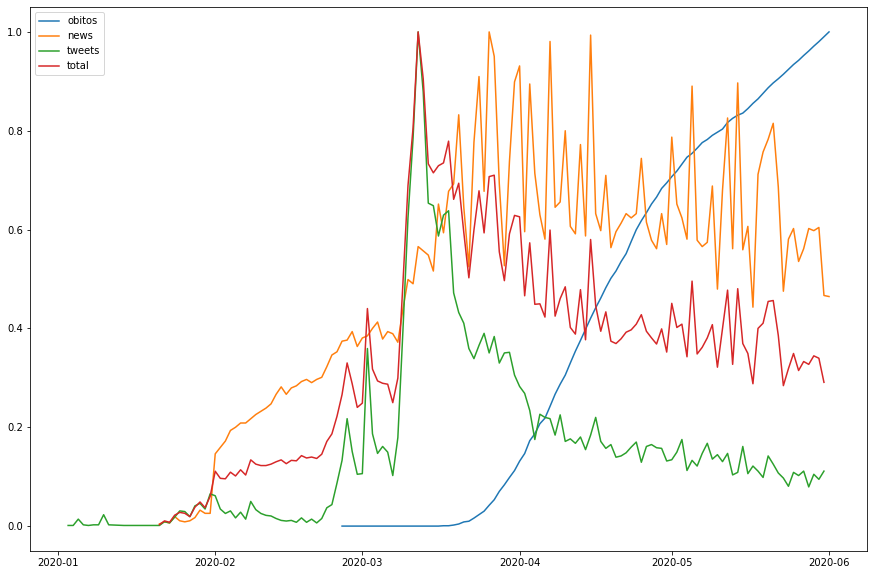

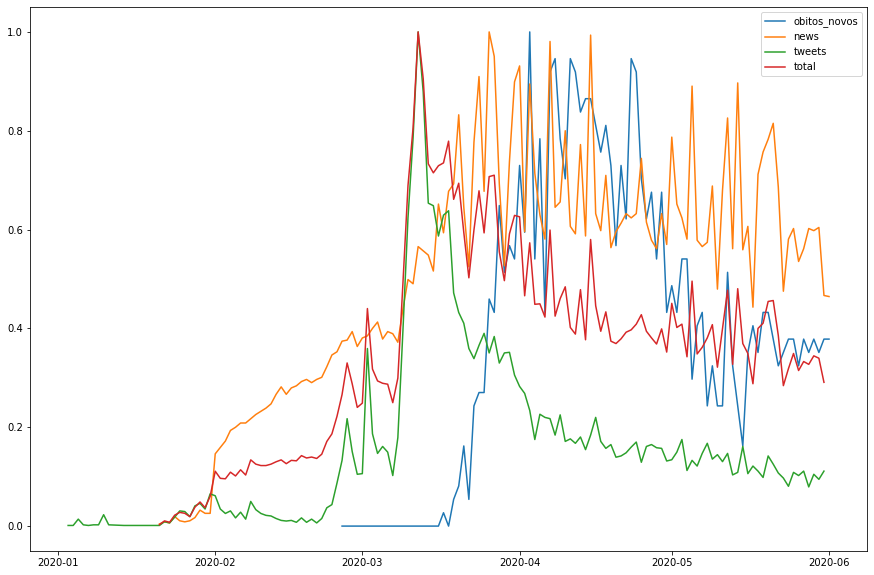

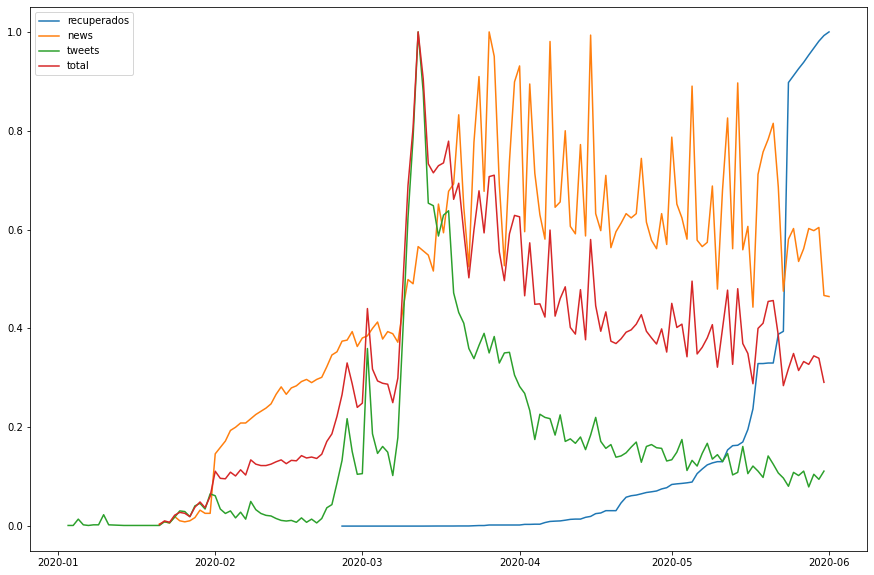

In [86]:
for col in ['confirmados', 'confirmados_novos', 'obitos', 'obitos_novos', 'recuperados']:
    fig, ax = plt.subplots(figsize=(15,10))
    y_covid = df_covid[col]
    ax.plot(df_covid['data'], y_covid/max(y_covid), label=col)
    y_news = df_news[df_news.data <= '2020/06/01'].data.value_counts().sort_index()
    ax.plot(y_news/max(y_news), label='news')
    y_tweets = df_tweets[df_tweets.date <= '2020/06/01'].date.dt.date.value_counts().sort_index()
    ax.plot(y_tweets/max(y_tweets), label='tweets')
    y_total = y_news + y_tweets
    ax.plot(y_total/max(y_total.dropna()), label='total')
    plt.legend()

In [65]:
max(x_total.dropna())

1045.0

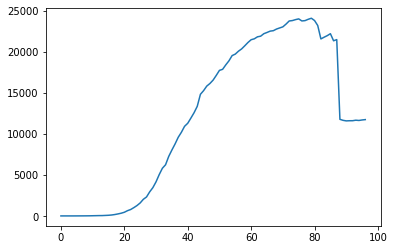

In [184]:
plt.plot(y_list[2] - (y_list[1] + y_list[0]))

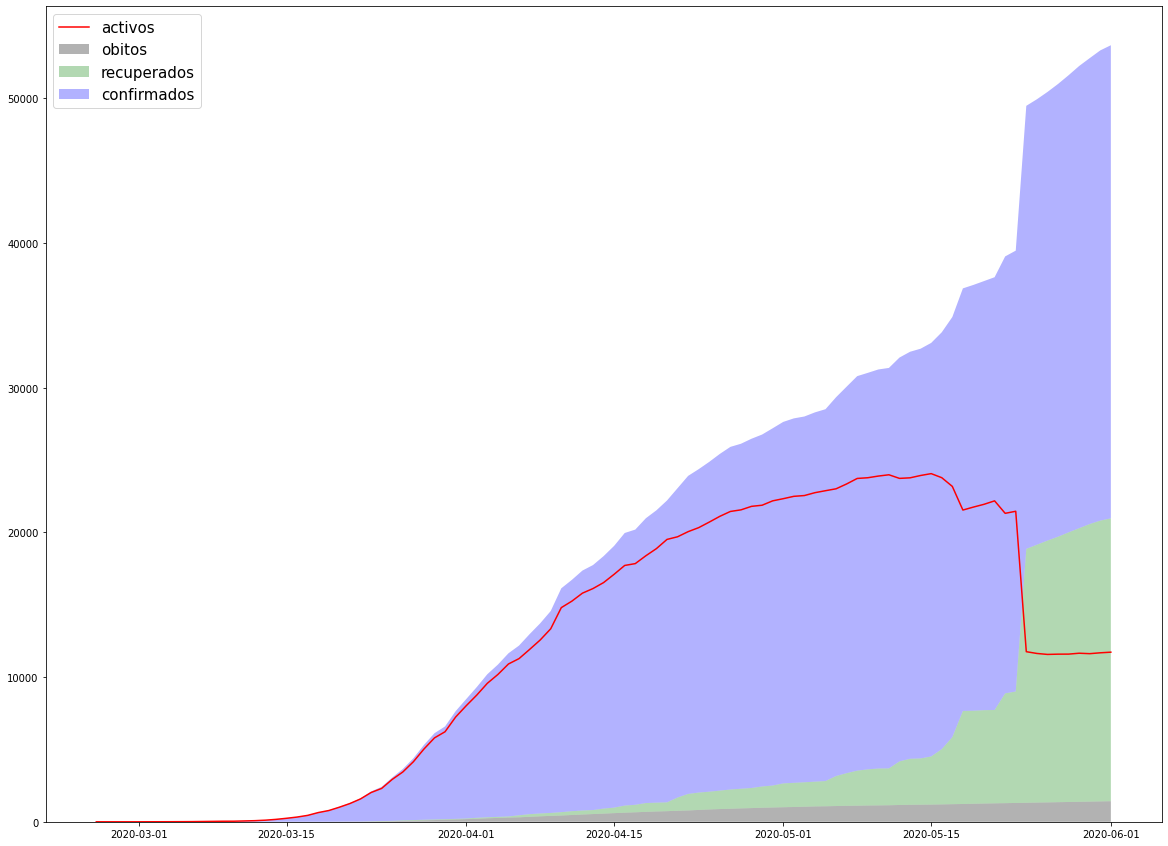

In [204]:
fig, ax = plt.subplots(figsize=(20,15))
y_list = [df_covid[col].values for col in ['obitos', 'recuperados', 'confirmados']]
y_activos = y_list[2] - (y_list[1] + y_list[0])
ax.stackplot(df_covid.data, y_list, colors=['black', 'green', 'blue'], alpha=0.3, labels=['obitos', 'recuperados', 'confirmados'])
ax.plot(df_covid.data, y_activos, color='red', label='activos')
plt.legend(loc='upper left', fontsize=15)

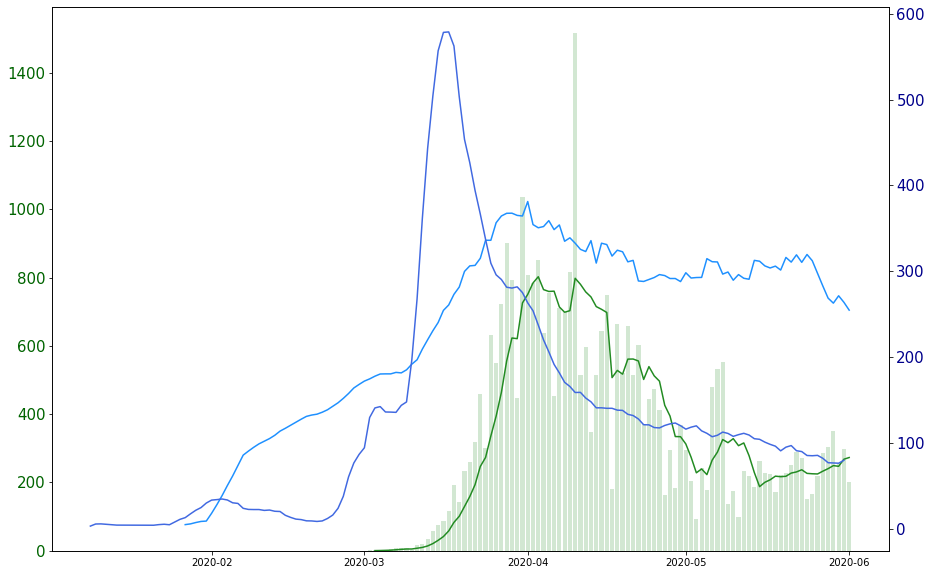

In [144]:
# ['confirmados', 'confirmados_novos', 'obitos', 'obitos_novos', 'recuperados']:
y_news = df_news[df_news.data <= '2020/06/01'].data.value_counts().sort_index()
y_tweets = df_tweets[df_tweets.date <= '2020/06/01'].date.dt.date.value_counts().sort_index()
y_total = y_news + y_tweets
y_covid = df_covid['confirmados_novos']

fig, ax1 = plt.subplots(figsize=(15,10))

ax1.bar(df_covid['data'], y_covid, alpha=0.2, color='forestgreen')
ax1.plot(df_covid['data'], y_covid.rolling(7).mean(), label='confirmados_novos', color='forestgreen')

ax1.tick_params(axis='y', labelcolor='darkgreen', labelsize=15)
ax2 = ax1.twinx()

#ax2.plot(y_news, color='red', alpha=0.2)
ax2.plot(y_news.rolling(7).mean(), color='dodgerblue')
ax2.plot(y_tweets.rolling(7).mean(), color='royalblue')
ax2.tick_params(axis='y', labelcolor='darkblue', labelsize=15)



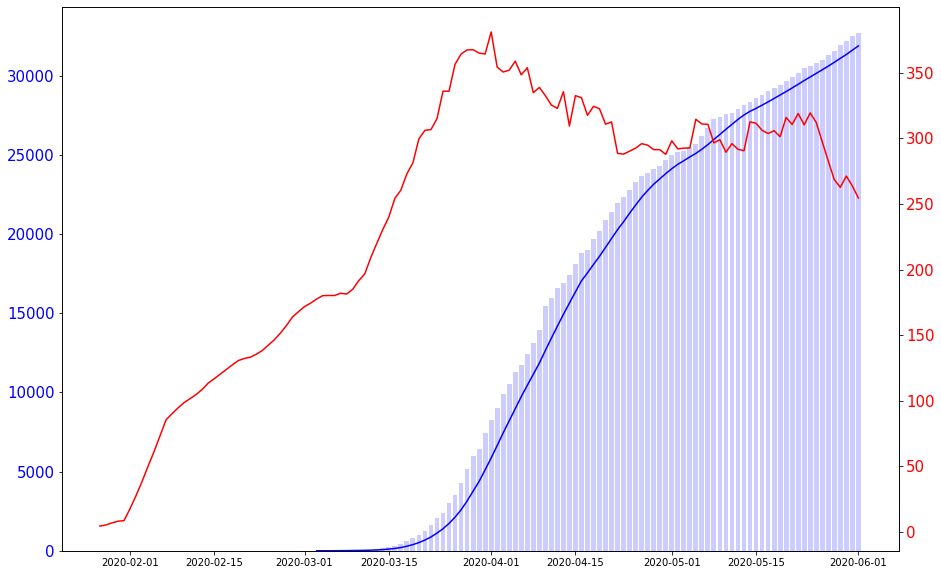

In [117]:
# ['confirmados', 'confirmados_novos', 'obitos', 'obitos_novos', 'recuperados']:
y_news = df_news[df_news.data <= '2020/06/01'].data.value_counts().sort_index()
y_tweets = df_tweets[df_tweets.date <= '2020/06/01'].date.dt.date.value_counts().sort_index()
y_total = y_news + y_tweets
y_covid = df_covid['confirmados']

fig, ax1 = plt.subplots(figsize=(15,10))

ax1.bar(df_covid['data'], y_covid, label='confirmados_novos', alpha=0.2, color='blue')
ax1.plot(df_covid['data'], y_covid.rolling(7).mean(), label='confirmados', color='blue')

ax1.tick_params(axis='y', labelcolor='blue', labelsize=15)
ax2 = ax1.twinx()

#ax2.plot(y_news, color='red', alpha=0.2)
ax2.plot(y_news.rolling(7).mean(), color='red')

ax2.tick_params(axis='y', labelcolor='red', labelsize=15)

